
# **Simple multi-layer perceptron**


In [1]:
from __future__ import print_function

import keras # deep learning package based on tensorflow
from keras.datasets import mnist
from keras.models import Sequential # network where layers in a sequence: first, then second, then third
from keras.layers import Dense, Dropout # dense network, and dropout - a way to avoid overfitting
from keras.utils.np_utils import to_categorical # convert labels to categorical values
from tensorflow.keras.optimizers import RMSprop # optimizer
import numpy as np

**Set vars, load MNIST (hand written digits) data**

In [2]:
batch_size = 20000 # batches - if have 10k input samples, cut them into pieces so you're not working with all samples at once. tells you how many samples you'll use for every time you update your model. Setting it is an art. (divides the data into blocks of 20k)
num_classes = 10
epochs = 5 # number of times all the batches are passed to the model

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
np.sum(y_train==8)

5851

**Visualize data**

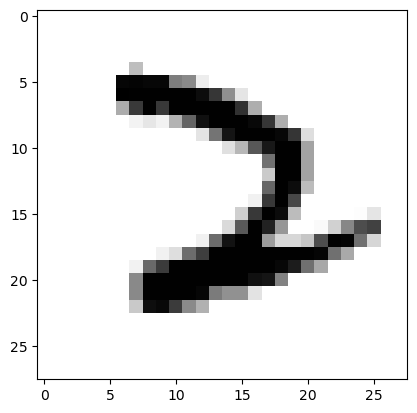

2


In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[3890],cmap=plt.cm.binary)
plt.show()
x_train[0].shape

print(y_train[3890])

In [3]:
x_train = x_train.reshape(60000, 784) # flatten images
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') # save as float
x_test = x_test.astype('float32')
x_train /= 255 # standardize: divide by max value (normalized between 0 and 1)
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train[0:20]

60000 train samples
10000 test samples


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [7]:
y_train.shape

(60000,)

In [4]:
# convert class vectors to binary class matrices - convert to categoricals
y_train = to_categorical(y_train, num_classes) # convert test data (values 0-9) to matrix of 10 values, with a 1 in the position that the label is, and 0 in positions that the label is not - like a dummy variable
y_test = to_categorical(y_test, num_classes)

y_train.shape

(60000, 10)

In [9]:
y_train[0:20,:]
# first row: the 1 is in the 5 place: the label is 5
# second row: the 1 is in the 0 place: the label is 0

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

**Model description**

- Put the "lego blocks" together


In [5]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,))) # first layer - set number of nodes: input shape (784 features). Is a Dense layer (a layer that will be connected to all the nodes of the next layer). 512: the number of nodes in the next layer (i.e. the layer that it's connected to). Set arbitrarily. 512 is actually quite a lot. Maybe better to make it a smaller number.
# relu is type of activation function - like sigmoid. tells it when it is activated (passes a certain threshold)
# MUST keep input shape to the shape of the data
#model.add(Dropout(0.2))
# dropout - way to avoid overfitting. network just drops some of the weights. no parameters because it just removes some weights (20 percent of them).
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu')) # sure, you can go up
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax')) # last (output) layer - has number of labels (num_classes = 10). 
# MUST keep num_classes consistent to the number of classes in the data
#Softmax = probabilistic data, finds the maximum of the probabilities for the label output.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 68,202
Trainable params: 68,202
Non-traina

**Visualization of the model**

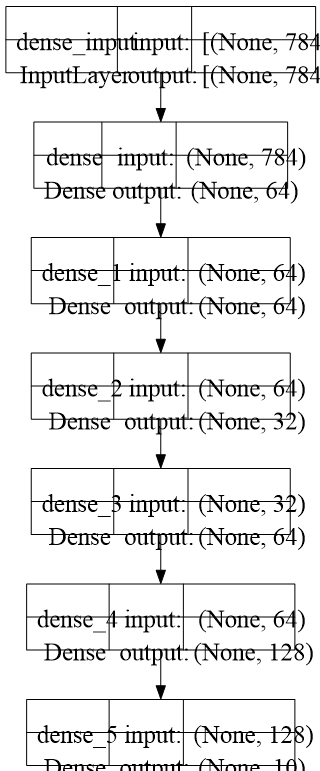

In [6]:
from keras.utils.vis_utils import plot_model

#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
plot_model(model, show_shapes=True, show_layer_names=True)

**Compile the model**

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

**Fit the model**

In [8]:
history = model.fit(x_train, y_train, # training data
                    batch_size=batch_size,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, y_test)) # testing data - used during training to optimize. Different from regular ML

Epoch 1/50
3/3 [==============================] - 3s 256ms/step - loss: 2.2672 - accuracy: 0.1624 - val_loss: 2.1433 - val_accuracy: 0.3270
Epoch 2/50
3/3 [==============================] - 1s 100ms/step - loss: 2.0521 - accuracy: 0.3142 - val_loss: 1.8226 - val_accuracy: 0.3595
Epoch 3/50
3/3 [==============================] - 0s 112ms/step - loss: 1.7306 - accuracy: 0.4098 - val_loss: 1.4925 - val_accuracy: 0.5709
Epoch 4/50
3/3 [==============================] - 0s 116ms/step - loss: 1.4224 - accuracy: 0.6031 - val_loss: 1.4092 - val_accuracy: 0.5768
Epoch 5/50
3/3 [==============================] - 0s 132ms/step - loss: 1.3390 - accuracy: 0.5905 - val_loss: 1.1015 - val_accuracy: 0.7361
Epoch 6/50
3/3 [==============================] - 0s 120ms/step - loss: 1.0459 - accuracy: 0.7268 - val_loss: 0.9330 - val_accuracy: 0.7385
Epoch 7/50
3/3 [==============================] - 0s 84ms/step - loss: 0.9432 - accuracy: 0.7205 - val_loss: 0.9238 - val_accuracy: 0.7085
Epoch 8/50
3/3 [=====

**Evaluate the model**

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2862410545349121
Test accuracy: 0.9108999967575073
